<a href="https://colab.research.google.com/github/nmhaddad/python-machine-learning-youtube/blob/master/cs6140_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pattern Recognition in Daily Top Trending YouTube Videos**

***

# Exploratory Data Analysis

# Setup

***

**Imports**

In [0]:
import pandas as pd
from google.colab import drive
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

**Load Data From Google Drive**

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Read-in CSV & JSON**

In [0]:
videos = pd.read_csv("/content/drive/My Drive/cs6140 project/data/USvideos.csv")
videos_categories = pd.read_json("/content/drive/My Drive/cs6140 project/data/US_category_id.json")

In [0]:
videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Data Pre-Processing 

***

In [0]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


This block of code links the csv to json categories

In [0]:
# source: https://www.kaggle.com/skalskip/youtube-data-exploration-and-plotly-visualization

categories = {category['id']: category['snippet']['title'] for category in videos_categories['items']}
videos.insert(4, 'category', videos['category_id'].astype(str).map(categories))

Remove Duplicates

In [0]:
print(videos.shape[0])

40949


In [0]:
videos = videos.dropna()

In [0]:
print(videos.shape[0])

40379


**Creating New Attributes**

In [0]:
videos["likes_per_view"] = videos["likes"]/videos["views"]
videos["dislikes_per_view"] = videos["dislikes"]/videos["views"]
videos["comments_per_view"] = videos["comment_count"]/videos["views"]

videos["total_likes_dislikes"] = videos["likes"] + videos["dislikes"]
videos["total_likes_dislikes_per_view"] = videos["total_likes_dislikes"]/videos["views"]

videos["likes_percentage"] = videos["likes"]/videos["total_likes_dislikes"]
videos["dislikes_percentage"] =videos["dislikes"]/videos["total_likes_dislikes"]

In [0]:
# source https://www.kaggle.com/skalskip/youtube-data-exploration-and-plotly-visualization

videos['trending_date'] = pd.to_datetime(videos['trending_date'], format='%y.%d.%m').dt.date
reformatted_time = pd.to_datetime(videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
videos['publish_date'] = reformatted_time.dt.date
videos['publish_time'] = reformatted_time.dt.time
videos['publish_hour'] = reformatted_time.dt.hour

In [0]:
# get the number of characters in a given title
videos["title_characters"] = videos["title"].apply(lambda x : len(x))
# get the number of words in a given title
videos["title_words"] = videos["title"].apply(lambda x : len(x.split()))

In [0]:
# get the number of characters in a given description
videos["description_characters"] = videos["description"].apply(lambda x : len(str(x)))
# get the number of words in a given description
videos["description_words"] = videos["description"].apply(lambda x : len(str(x).split()))

**Normalize**

In [0]:
videos = videos.dropna()

In [0]:
videos.sample(1)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,likes_per_view,dislikes_per_view,comments_per_view,total_likes_dislikes,total_likes_dislikes_per_view,likes_percentage,dislikes_percentage,publish_date,publish_hour,title_characters,title_words,description_characters,description_words
20672,17x4Auq4Tw4,2018-02-27,100 Years of Eyes | Allure,Allure,Entertainment,24,17:00:50,"100 years|""100 years of""|""100 years of eyes""|""...",440230,9298,554,454,https://i.ytimg.com/vi/17x4Auq4Tw4/default.jpg,False,False,False,"Take a look back at the last century of eyes, ...",0.021121,0.001258,0.001031,9852,0.022379,0.943768,0.056232,2018-02-22,17,26,6,476,78


In [0]:
min_max_scaler = preprocessing.MinMaxScaler()

col = ['views','likes','dislikes','comment_count','likes_per_view',
       'comments_per_view','total_likes_dislikes_per_view','likes_percentage',
       'dislikes_percentage','publish_hour','title_characters','title_words',
       'description_characters','description_words','total_likes_dislikes']

for column in col:
  x = videos[col].values.astype('float32')
  normed_videos = min_max_scaler.fit_transform(x)
  videos[col] = pd.DataFrame(normed_videos)

# **Exploratory Data Analysis**

***



In [0]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40209 entries, 0 to 40948
Data columns (total 30 columns):
video_id                         40209 non-null object
trending_date                    40209 non-null object
title                            40209 non-null object
channel_title                    40209 non-null object
category                         40209 non-null object
category_id                      40209 non-null int64
publish_time                     40209 non-null object
tags                             40209 non-null object
views                            30023 non-null float32
likes                            30023 non-null float32
dislikes                         30023 non-null float32
comment_count                    30023 non-null float32
thumbnail_link                   40209 non-null object
comments_disabled                40209 non-null bool
ratings_disabled                 40209 non-null bool
video_error_or_removed           40209 non-null bool
description   

In [0]:
videos.describe()

,category_id,views,likes,dislikes,comment_count,likes_per_view,dislikes_per_view,comments_per_view,total_likes_dislikes,total_likes_dislikes_per_view,likes_percentage,dislikes_percentage,publish_hour,title_characters,title_words,description_characters,description_words
count,40209.000000,30023.000000,30023.000000,30023.000000,30023.000000,30023.000000,40209.000000,30023.000000,30023.000000,30023.000000,30023.000000,30023.000000,30023.000000,30023.000000,30023.000000,30023.000000,30023.000000
mean,19.950757,0.011166,0.014089,0.002259,0.007066,0.128755,0.001604,0.039060,0.014225,0.130979,0.935515,0.064485,0.601055,0.470054,0.341988,0.205595,0.148162
std,7.588856,0.034448,0.042629,0.014373,0.028858,0.099908,0.003726,0.050081,0.043333,0.097914,0.097490,0.097490,0.277254,0.202586,0.159700,0.167055,0.134237
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.001193,0.001111,0.000136,0.000551,0.058088,0.000560,0.014186,0.001169,0.061800,0.932063,0.017159,0.478261,0.319588,0.227273,0.085513,0.052764
50%,24.000000,0.003293,0.003511,0.000420,0.001655,0.105496,0.000919,0.026028,0.003594,0.109277,0.967228,0.032772,0.652174,0.443299,0.318182,0.165951,0.109296
75%,25.000000,0.008575,0.010547,0.001273,0.005012,0.173846,0.001596,0.045804,0.010595,0.175418,0.982841,0.067938,0.782609,0.597938,0.454545,0.274893,0.195980
max,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.191531,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Correlation Matrix:**

In [0]:
corr_matrix = videos.corr()
corr_matrix["views"].sort_values(ascending=False)

views                            1.000000
total_likes_dislikes             0.863571
likes                            0.853912
comment_count                    0.665691
dislikes                         0.570201
likes_percentage                 0.026506
category_id                      0.002662
video_error_or_removed          -0.000721
comments_disabled               -0.008447
dislikes_per_view               -0.009630
description_characters          -0.017044
description_words               -0.018835
dislikes_percentage             -0.026506
title_words                     -0.029418
title_characters                -0.030462
likes_per_view                  -0.040740
total_likes_dislikes_per_view   -0.041964
comments_per_view               -0.055964
publish_hour                    -0.075125
ratings_disabled                      NaN
Name: views, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff57f88d6d8>,
      dtype=object)

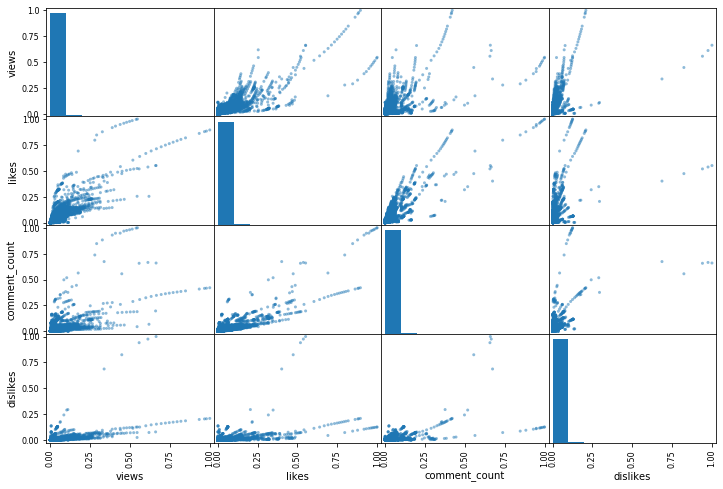

In [0]:
attributes = ["views", "likes", "comment_count", "dislikes"]
scatter_matrix(videos[attributes], figsize=(12,8))

# **Top 10 Most Viewed**

In [0]:
videos.nlargest(10, "views")

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,likes_per_view,dislikes_per_view,comments_per_view,total_likes_dislikes,total_likes_dislikes_per_view,likes_percentage,dislikes_percentage,publish_date,publish_hour,title_characters,title_words,description_characters,description_words
28576,DNrNMg8_gEs,2018-04-14,My Mom Buys My Outfits!,Ryland Adams,Entertainment,24,18:00:01,"Ryland Adams|""Shane Dawson""|""Clothing Haul""|""M...",1.000000,0.894835,0.209086,0.420974,https://i.ytimg.com/vi/DNrNMg8_gEs/default.jpg,False,False,False,My Mom Buys My Outfits! \n\nFOLLOW MY MOM!\nIN...,0.082426,0.000544,0.020237,0.922050,0.085559,0.935990,0.064010,2018-04-11,0.173913,0.494845,0.318182,0.044123,0.036432
28402,YvEGAcgpwqQ,2018-04-07,Grab Your Partner | Kevin Hart: What The Fit |...,LOL Network,Comedy,23,17:00:10,"What the Fit|""Kevin Hart What the Fit""|""Kevin ...",0.979036,0.883961,0.205778,0.416990,https://i.ytimg.com/vi/YvEGAcgpwqQ/default.jpg,False,False,False,"To Kevin Hart, they’re not partner push-ups—th...",0.083167,0.000698,0.020474,0.910628,0.086311,0.936213,0.063787,2018-04-02,0.173913,0.494845,0.318182,0.044123,0.036432
28230,VaGcPRMY5UM,2018-04-06,Tinashe - Me So Bad (Official Video) ft. Ty Do...,TinasheOfficialVEVO,Music,10,04:00:02,"Me So Bad|""R&B""|""RCA Records Label""|""Tinashe f...",0.966868,0.878935,0.204169,0.414924,https://i.ytimg.com/vi/VaGcPRMY5UM/default.jpg,False,False,False,JOYRIDE arriving 4/13 - Pre-order now: http://...,0.083735,0.001301,0.020629,0.905326,0.086890,0.936341,0.063659,2018-03-30,0.173913,0.494845,0.318182,0.044123,0.036432
28045,5hpuoMilm_4,2018-04-05,73 Questions With CL | Vogue,Vogue,People & Blogs,22,12:00:59,"2ne1|""73 questions""|""celeb style""|""celebrity""|...",0.933960,0.861524,0.198959,0.408351,https://i.ytimg.com/vi/5hpuoMilm_4/default.jpg,False,False,False,We caught up with K-pop star CL while she's st...,0.084969,0.001139,0.021018,0.887064,0.088142,0.936688,0.063312,2018-03-29,0.173913,0.494845,0.318182,0.044123,0.036432
27333,yWjRvhfjpI8,2018-04-01,Talking Kitty Cat - World's Most Spoiled Cat,Talking Kitty Cat,Comedy,23,03:44:27,"Talking|""kitty""|""cat""|""black cat""|""stevecash83...",0.847870,0.818502,0.185894,0.390604,https://i.ytimg.com/vi/yWjRvhfjpI8/default.jpg,False,False,False,Sylvester the talking kitty cat gets an unwant...,0.088922,0.002621,0.022146,0.841883,0.092159,0.937671,0.062329,2018-03-19,0.173913,0.494845,0.318182,0.044123,0.036432
27151,CUNq2_VjRn4,2018-04-01,Lucas the Spider - Encore,Lucas the Spider,Film & Animation,1,18:21:43,"LucastheSpider|""Animation""|""3D Animation""|""Har...",0.818990,0.803788,0.181465,0.385006,https://i.ytimg.com/vi/CUNq2_VjRn4/default.jpg,False,False,False,Being the world's most musical spider takes a ...,0.090403,0.001230,0.022598,0.826441,0.093664,0.938019,0.061981,2018-03-30,0.173913,0.494845,0.318182,0.044123,0.036432
26973,HxuHo62reRw,2018-03-31,How To Make Mesmerizing Japanese Desserts,Tasty,Howto & Style,26,19:00:37,"BuzzFeed|""BuzzFeed Tasty""|""Tasty""|""desserts""|""...",0.795008,0.790401,0.177168,0.379659,https://i.ytimg.com/vi/HxuHo62reRw/default.jpg,False,False,False,Shop the Tasty kitchenware collection here: ht...,0.091579,0.000468,0.022957,0.812318,0.094844,0.938435,0.061565,2018-03-28,0.173913,0.494845,0.318182,0.044123,0.036432
26795,jHZTzXteoU8,2018-03-30,NEW MAKEUP LAUNCHES | WHATS GOOD + WHATS NOT S...,KathleenLights,Howto & Style,26,17:30:01,"klpolish|""whats new""|""in makeup""|""releases""|""l...",0.770288,0.776675,0.172825,0.374637,https://i.ytimg.com/vi/jHZTzXteoU8/default.jpg,False,False,False,"Hey, Guys! (WATCH IN HD)\nHere is a video wher...",0.092876,0.000904,0.023380,0.797854,0.096149,0.938855,0.061145,2018-03-26,0.173913,0.494845,0.318182,0.044123,0.036432
26617,FwENtwtY0EI,2018-03-29,MASSIVE Bowl of Fruity Pebbles!! (Challenge),Matt Stonie,Enterta

# **Ranked Categories**

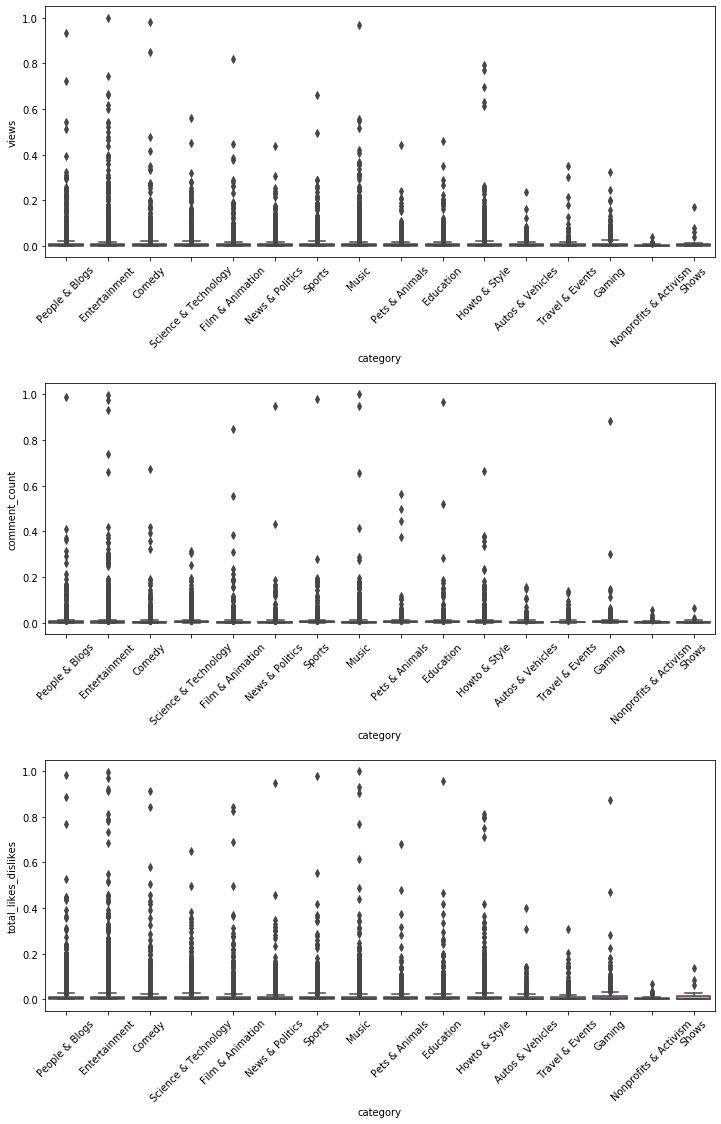

In [0]:
# source https://www.kaggle.com/kabure/extensive-usa-youtube-eda

plt.figure(figsize = (12,18))

plt.subplot(311)
cat_graph_1 = sns.boxplot(x='category',y='views',  data=videos)
cat_graph_1.set_xticklabels(cat_graph_1.get_xticklabels(),rotation=45)

plt.subplot(312)
cat_graph_2 = sns.boxplot(x='category',y='comment_count',  data=videos)
cat_graph_2.set_xticklabels(cat_graph_2.get_xticklabels(),rotation=45)

plt.subplot(313)
cat_graph_3 = sns.boxplot(x='category',y='total_likes_dislikes',  data=videos)
cat_graph_3.set_xticklabels(cat_graph_3.get_xticklabels(),rotation=45)

plt.subplots_adjust(wspace=0.2, hspace=0.5, top=0.9)
plt.show()

# **User Interactivity Experiments**

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


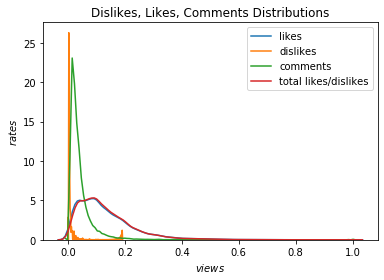

In [0]:
dlc_corr_dist = sns.distplot(videos["likes_per_view"], hist=False, label="likes")
dlc_corr_dist = sns.distplot(videos["dislikes_per_view"], hist=False,label ="dislikes")
dlc_corr_dist = sns.distplot(videos["comments_per_view"], hist=False,label ="comments")
dlc_corr_dist = sns.distplot(videos["total_likes_dislikes_per_view"], hist=False, label="total likes/dislikes")

dlc_corr_dist.set_title("Dislikes, Likes, Comments Distributions")
dlc_corr_dist.set(xlabel="$views$", ylabel="$rates$")

plt.legend()
plt.show()

# Text Experiments

***

In [0]:
print(len(videos))

40209


In [0]:
videos.drop_duplicates(subset="title", keep="last", inplace=True)

In [0]:
print(len(videos))

6328


**Title**

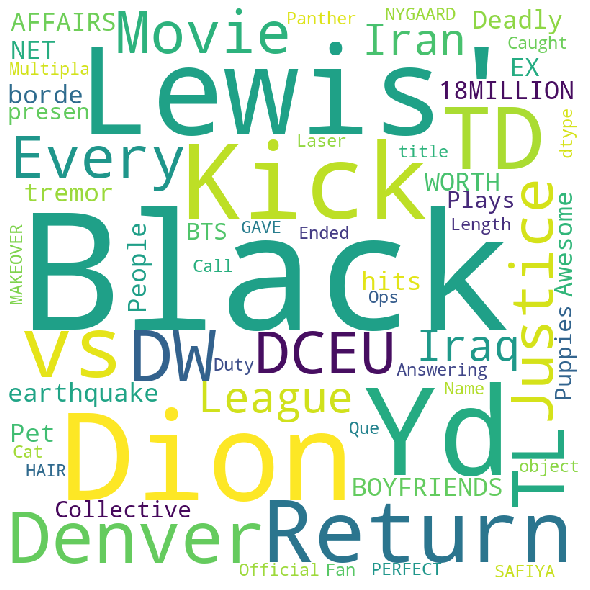

In [0]:
wordcloud = WordCloud(width=800, height=800,
                      background_color="white",
                      stopwords=set(STOPWORDS),
                      min_font_size=10).generate(str(videos["title"]))
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Description**

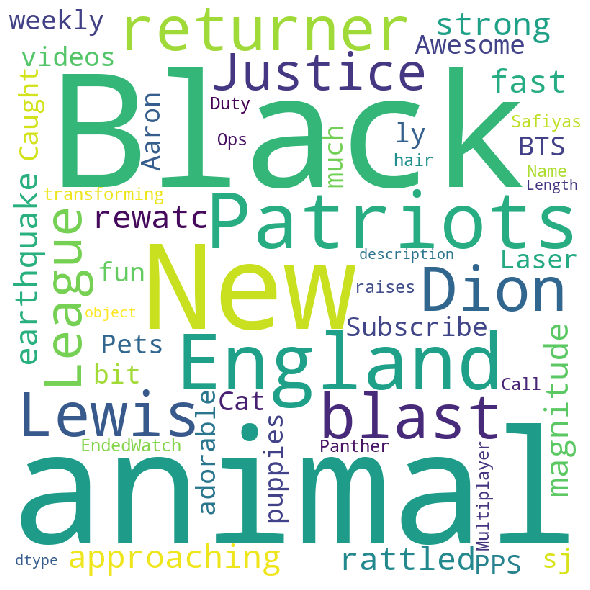

In [0]:
wordcloud = WordCloud(width=800, height=800,
                      background_color="white",
                      stopwords=set(STOPWORDS),
                      min_font_size=10).generate(str(videos["description"]))
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Channel Title**

In [0]:
"""
function: parse_channel_title
params: text, a string
returns: a string
does: parses for incorrect text
"""
def parse_channel_title(text):
  if 'channel_title' in str(text).split(' '):
    return ''
  return text

In [0]:
# videos['channel_title'] = videos['channel_title'].apply(parse_channel_title)

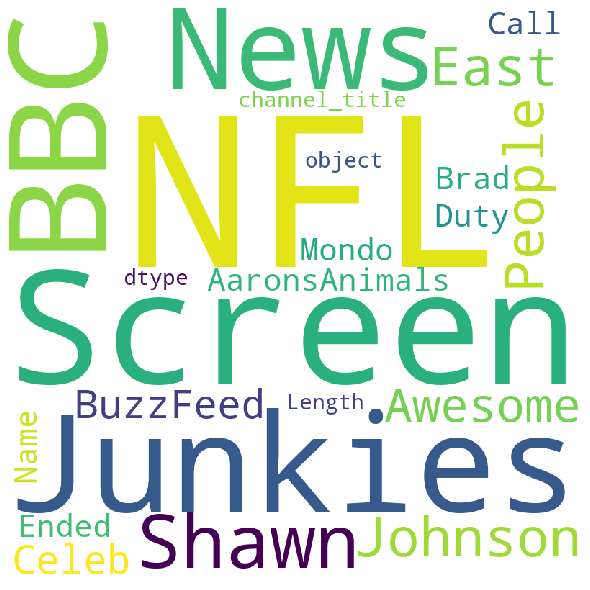

In [0]:
wordcloud = WordCloud(width=800, height=800,
                      background_color="white",
                      stopwords=set(STOPWORDS),
                      min_font_size=10).generate(str(videos["channel_title"]))
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Tags**

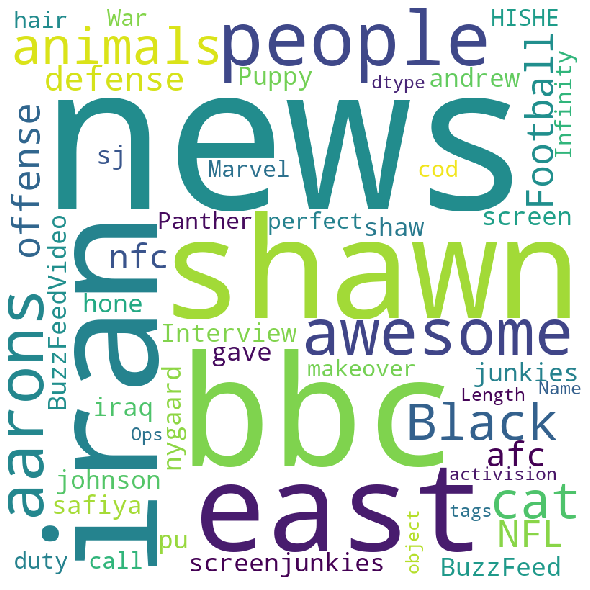

In [0]:
wordcloud = WordCloud(width=800, height=800,
                      background_color="white",
                      stopwords=set(STOPWORDS),
                      min_font_size=10).generate(str(videos["tags"]))
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()